##

:::{.absolute top=150 left=30 width=350 height=100}
$$
σ = √(Σ(Ri - R̄)² / (N - 1)) * √W
$$
:::

:::{.absolute top=300 left=30 width=600 height=800}
Where:

1. Ri = Return in the period i
2. R̄ = Average return over the period
3. N = Number of periods
4. W = Number of periods in a year 
5. (W=52 for weekly returns)

:::

##

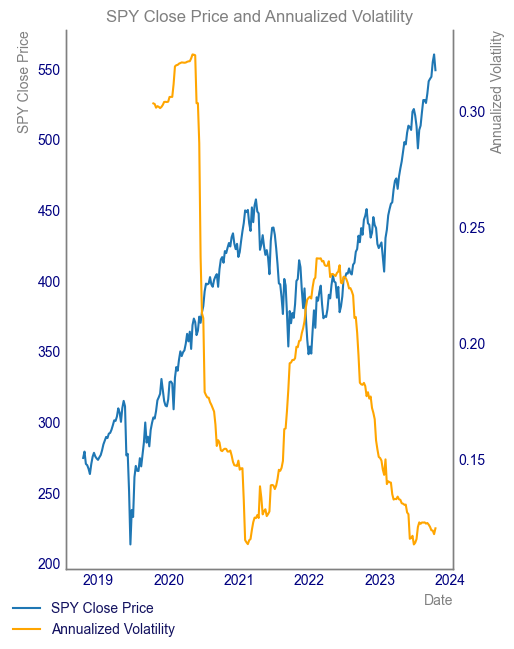

In [19]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetch SPY data
spy = yf.Ticker('SPY')
history = spy.history(period='5y', interval='1wk')

# Calculate weekly returns
returns = history['Close'].pct_change().dropna()

# Calculate historical volatility (annualized)
volatility = returns.std() * np.sqrt(52)

# Plotting
plt.style.use('ddm-chart.mplstyle')
fig, ax1 = plt.subplots()

ax1.plot(history.index, history['Close'], label='SPY Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Close Price')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12)) 

ax2 = ax1.twinx()
ax2.plot(returns.index, returns.rolling(window=52).std() * np.sqrt(52), label='Annualized Volatility', color='orange')
ax2.set_ylabel('Annualized Volatility')
fig.legend(loc='lower left')

plt.title('SPY Close Price and Annualized Volatility')
plt.show()
